### 1.1* Compare the difference on Flan_v2 dataset

- orginal 49K samples / full 100k Samples  on the same template

Dataset flan_v2_old: Counter({7: 16307, 6: 10433, 5: 10142, 8: 5934, 0: 3406, 4: 1957, 9: 507, 3: 424, 2: 7, 11: 3, 12: 1, 10: 1, 1: 1})
Dataset flan_v2_old: Revised Counter({3: 16307, 2: 10433, 1: 10142, 4: 5934, 0: 5795, 5: 512}) 



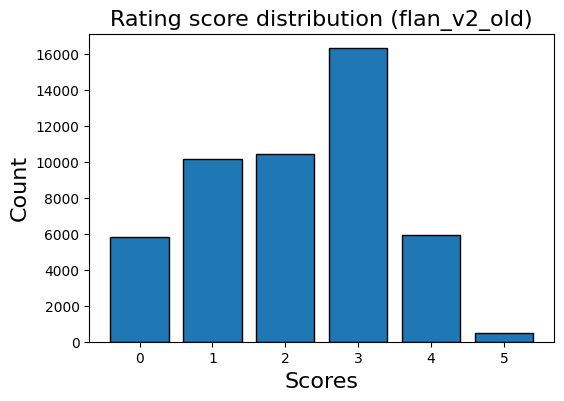

In [4]:
import torch
from collections import Counter
import  matplotlib.pyplot as plt
import os

dataset_list = ['flan_v2_old'] #tag:flan_v2_old

# dataset_list=['stanford_alpaca']

model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
# model_name='google/gemma-2-9b-it'
# model_name= "mistralai/mixtral-8x22b-instruct-v0.1"


for dataset_name in dataset_list:
    # dataset_name = 'flan_v2'
    path = f"./new_train_data/{model_name}/{dataset_name}/"

    orginal_data_path = f"./zzz-test/output/{model_name}/{dataset_name}/"
    if not os.path.exists(path):
        os.makedirs(path)

    # original_labels = torch.load(orginal_data_path +'total_output_labels_best.pt')
    original_labels = torch.load(orginal_data_path +'output_labels.pt')
    original_labels = [label[-1] for label in original_labels]

    label_counts = Counter(original_labels)
    print(f"Dataset {dataset_name}: {label_counts}")


    labels_revised = []
    for label in original_labels:
        if label < 4:
            labels_revised.append(4)
        elif label >= 10:
            labels_revised.append(9)
        else:
            labels_revised.append(label)

    labels_revised = [label - 4 for label in labels_revised] #rematching

    label_counts_revised = Counter(labels_revised)
    print(f"Dataset {dataset_name}: Revised {label_counts_revised} \n")

    torch.save(labels_revised, path + "output_labels_revised.pt")

    # plt.figure(figsize=(8, 6))
    # keys = list(label_counts.keys())
    # values = list(label_counts.values())
    # plt.bar(keys, values, edgecolor='black')
    # plt.title(f'Labeling model: {model_name};  Labels Distribution for {dataset_name}')
    # plt.xlabel('Labels')
    # plt.ylabel('Count')
    # plt.xticks(keys)  # 设置x轴标签
    # plt.show()

    # 绘制修订标签的柱状图
    plt.figure(figsize=(6, 4))
    keys_revised = list(label_counts_revised.keys())
    values_revised = list(label_counts_revised.values())
    plt.bar(keys_revised, values_revised, edgecolor='black')
    # plt.title(f'Labeling model: {model_name}; Labels Distribution ({dataset_name})')
    plt.title(f'Rating score distribution ({dataset_name})', fontsize=16)

    plt.xlabel('Scores', fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.xticks(keys_revised)  # 设置x轴标签
    plt.show()



### Print the label noise transition matrix

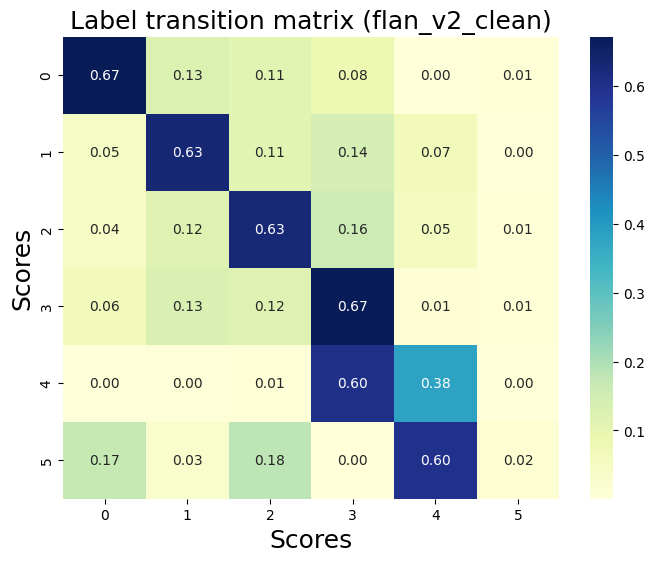

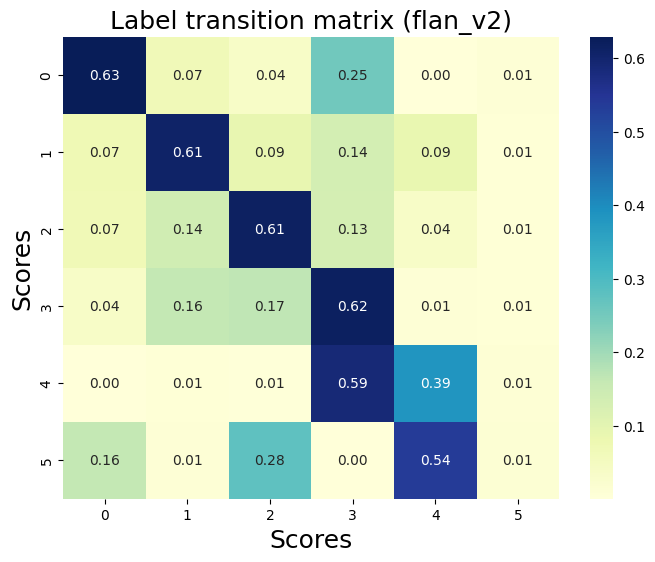

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# dataset_name ='oasst1'
dataset_list = ['flan_v2_clean','flan_v2']

for dataset_name in dataset_list:

    report_path = f"/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/labeling/results/{dataset_name}/{dataset_name}_report.pt"
    reports = torch.load(report_path)


    data= reports.diagnose['T']

    # 设置图形大小
    plt.figure(figsize=(8, 6))

    # 使用 seaborn 绘制热力图
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")

    # 添加标题和标签
    # plt.title(f'Label transition matrix: {dataset_name}; Labeling model: {model_name}', fontsize=18)
    plt.title(f'Label transition matrix ({dataset_name})', fontsize=18)
    plt.xlabel('Scores', fontsize=18)
    plt.ylabel('Scores', fontsize=18)

    # 显示图形
    plt.show()


### The results are almost the same